## Reading from a webcam

In [1]:
import numpy as np
import cv2

cam_id = 0  # camera id

# for default webcam, cam_id is usually 0
# try out other numbers (1,2,..) if this does not work

cap = cv2.VideoCapture(cam_id)


while True:
    ret, I = cap.read();


    cv2.imshow("my stream", I);


    # press "q" to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()



## Edge detection

uint8
uint8
int16
press any key to continue... 
0
0
768
-799
press any key to continue... 


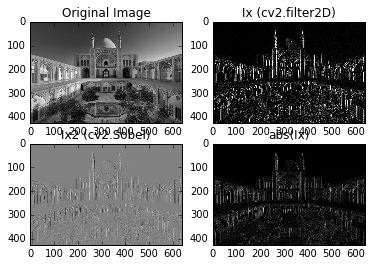

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

I = cv2.imread("agha-bozorg.jpg", cv2.IMREAD_GRAYSCALE)

# Compute the gradient in x direction using the sobel filter

# Method 1: using filter2D **********

Dx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]]); # Sobel filter

Ix = cv2.filter2D(I, -1, Dx); 
print I.dtype
print Ix.dtype

Ix = cv2.filter2D(I, cv2.CV_16S, Dx); # cv2.CV_16S: 16 bit signed integer
print Ix.dtype

raw_input('press any key to continue... ')

# Method 2: using sobel function **********
Ix2 = cv2.Sobel(I,cv2.CV_16S,1,0)

print np.abs(Ix - Ix2).max() 
print np.abs(Ix - Ix2).min() 
# Ix and Ix2 are same
print Ix2.max() 
print Ix2.min() 

raw_input('press any key to continue... ')

# Plot the gradient image
f, axes = plt.subplots(2, 2)

axes[0,0].imshow(I,cmap = 'gray')
axes[0,0].set_title("Original Image")

axes[0,1].imshow(Ix,cmap = 'gray')
axes[0,1].set_title("Ix (cv2.filter2D)")

axes[1,0].imshow(Ix2,cmap = 'gray')
axes[1,0].set_title("Ix2 (cv2.Sobel)")

axes[1,1].imshow(np.abs(Ix),cmap = 'gray')
axes[1,1].set_title("abs(Ix)")

# Notice that imshow in matplotlib considers the minimums value of I
# as black and the maximum value as white (this is different from
# the behaviour in cv2.imshow
plt.show()


float64
float64


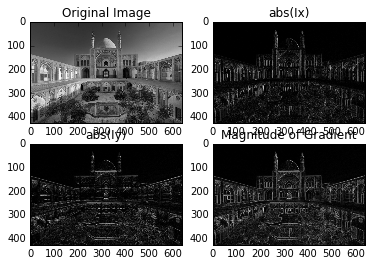

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

I = cv2.imread("agha-bozorg.jpg", cv2.IMREAD_GRAYSCALE)

# Sobel gradient in the x direction
Ix = cv2.Sobel(I,cv2.CV_64F,1,0)
print Ix.dtype

# Sobel gradient in the y direction
Iy = cv2.Sobel(I,cv2.CV_64F,0,1)
print Iy.dtype

# Magnitude of gradient
E = np.sqrt(Ix*Ix + Iy*Iy) 

# Plot the gradient image
f, axes = plt.subplots(2, 2)

axes[0,0].imshow(I,cmap = 'gray')
axes[0,0].set_title("Original Image")

axes[0,1].imshow(abs(Ix),cmap = 'gray')
axes[0,1].set_title("abs(Ix)")


axes[1,0].imshow(abs(Iy),cmap = 'gray')
axes[1,0].set_title("abs(Iy)")

axes[1,1].imshow(E,cmap = 'gray')
axes[1,1].set_title("Magnitude of Gradient")

# Notice that imshow in matplotlib considers the minimums value of I
# as black and the maximum value as white (this is different from
# the behaviour in cv2.imshow
plt.show()

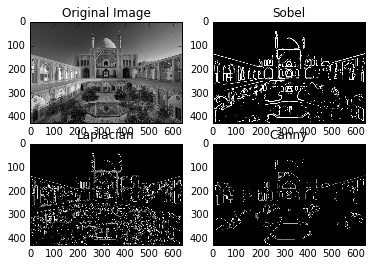

In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def std_filter(I, ksize):
    F = np.ones((ksize,ksize), dtype=np.float) / (ksize*ksize);
       
    MI = cv2.filter2D(I,-1,F) # apply mean filter on I

    I2 = I * I; # I squared
    MI2 = cv2.filter2D(I2,-1,F) # apply mean filter on I2

    return np.sqrt(MI2 - MI * MI)

def zero_crossing(I):
    """Finds locations at which zero-crossing occurs, used for
    Laplacian edge detector"""
    
    Ishrx = I.copy();
    Ishrx[:,1:] = Ishrx[:,:-1]
        
    Ishdy = I.copy();
    Ishdy[1:,:] = Ishdy[:-1,:]
        
    ZC = (I==0) | (I * Ishrx < 0) | (I * Ishdy < 0); # zero crossing locations

    SI = std_filter(I, 3) / I.max()

    Mask =  ZC & (SI > .1)

    E = Mask.astype(np.uint8) * 255 # the edges

    return E
    
I = cv2.imread("agha-bozorg.jpg", cv2.IMREAD_GRAYSCALE)

# set the sigma for Gaussian Blurring
sigma = 7

# Sobel magnitude of gradient 
thresh = 90 # threshold
Ib = cv2.GaussianBlur(I, (sigma,sigma), 0); # blur the image
Ix = cv2.Sobel(Ib,cv2.CV_64F,1,0)
Iy = cv2.Sobel(Ib,cv2.CV_64F,0,1)
Es = np.sqrt(Ix*Ix + Iy*Iy) 
Es = np.uint8(Es > thresh)*255 # threshold the gradients

# Laplacian of Gaussian
# Here, we first apply a Gaussian filter and then apply
# the Laplacian operator (instead of apply the LoG filter)
Ib = cv2.GaussianBlur(I, (sigma,sigma), 0);
El = cv2.Laplacian(Ib,cv2.CV_64F,ksize=5)
El = zero_crossing(El);

# Canny Edge detector
lth = 30 # low threshold
hth = 230  # high threshold
Ib = cv2.GaussianBlur(I, (sigma,sigma), 0); # blur the image
Ec = cv2.Canny(Ib,lth, hth)

f, axes = plt.subplots(2, 2)

axes[0,0].imshow(I,cmap = 'gray')
axes[0,0].set_title("Original Image")

axes[0,1].imshow(Es,cmap = 'gray')
axes[0,1].set_title("Sobel")


axes[1,0].imshow(El,cmap = 'gray')
axes[1,0].set_title("Laplacian")

axes[1,1].imshow(Ec,cmap = 'gray')
axes[1,1].set_title("Canny")

# Notice that imshow in matplotlib considers the minimums value of I
# as black and the maximum value as white (this is different from
# the behaviour in cv2.imshow)
plt.show()

In [ ]:
import numpy as np
import cv2

cam_id = 0  # camera id

# for default webcam, cam_id is usually 0
# try out other numbers (1,2,..) if this does not work

cap = cv2.VideoCapture(cam_id)

sigma = 5
thresh = 90 # threshold
mode = 'o' # show the original image at the beginning

def std_filter(I, ksize):
    F = np.ones((ksize,ksize), dtype=np.float) / (ksize*ksize);
       
    MI = cv2.filter2D(I,-1,F) # apply mean filter on I

    I2 = I * I; # I squared
    MI2 = cv2.filter2D(I2,-1,F) # apply mean filter on I2

    return np.sqrt(MI2 - MI * MI)

def zero_crossing(I):
    """Finds locations at which zero-crossing occurs, used for
    Laplacian edge detector"""
    
    Ishrx = I.copy();
    Ishrx[:,1:] = Ishrx[:,:-1]
        
    Ishdy = I.copy();
    Ishdy[1:,:] = Ishdy[:-1,:]
        
    ZC = (I==0) | (I * Ishrx < 0) | (I * Ishdy < 0); # zero crossing locations

    SI = std_filter(I, 3) / I.max()

    Mask =  ZC & (SI > .1)

    E = Mask.astype(np.uint8) * 255 # the edges

    return E


while True:
    ret, I = cap.read();
    I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY) # convert to grayscale
    Ib = cv2.GaussianBlur(I, (sigma,sigma), 0); # blur the image
    
    if mode == 'o':
        # J = the original image
        J = I
        
    elif mode == 'x':
        # J = gradient in x direction
        J = np.abs(cv2.Sobel(Ib,cv2.CV_64F,1,0));
        
    elif mode == 'y':
        # J = gradient in y direction
        J = np.abs(cv2.Sobel(Ib,cv2.CV_64F,0,1))
    elif mode == 'm':
        # Ix = gradient in x direction
        Ix = np.abs(cv2.Sobel(Ib,cv2.CV_64F,1,0))
        # Iy = gradient in y direction
        Iy = np.abs(cv2.Sobel(Ib,cv2.CV_64F,0,1))
        
        # Magnitude of gradient
        J = np.sqrt(Ix*Ix + Iy*Iy) 
        
    elif mode == 's':
        # J = Sobel + thresholding edge detection
        # Sobel magnitude of gradient 
        
        Ix = cv2.Sobel(Ib,cv2.CV_64F,1,0)
        Iy = cv2.Sobel(Ib,cv2.CV_64F,0,1)
        Es = np.sqrt(Ix*Ix + Iy*Iy) 
        J = np.uint8(Es > thresh)*255 # threshold the gradients
        
    elif mode == 'l':
        # J = laplacian
        Il = cv2.Laplacian(Ib,cv2.CV_64F)
        Il[Il<0] = 0
        J = Il
    elif mode == 'c':
        # J = canny edges
        J = cv2.Canny(Ib,100,180)
    
    # set the image type to float and the
    # maximum value to 1 (for a better illustration)
    # notice that imshow in opencv does not automatically
    # map the min and max values to black and white. 
    J = J.astype(np.float) / J.max();    
    cv2.imshow("my stream", J);

    key = chr(cv2.waitKey(1) & 0xFF)

    if key in ['o', 'x', 'y', 'm', 's', 'c', 'l']:
        mode = key
    if key == '-' and sigma > 1:
        sigma -= 2
        print "sigma = %d"%sigma
    if key in ['+','=']:
        sigma += 2    
        print "sigma = %d"%sigma
    elif key == 'q':
        break

cap.release()
cv2.destroyAllWindows()



sigma = 7
sigma = 9
sigma = 11
sigma = 13
sigma = 15
sigma = 17
sigma = 15
sigma = 13
sigma = 11
sigma = 9
sigma = 7
sigma = 5
sigma = 3


In [28]:
Ishrx  = np.array([[1,2,3],[4,5,6],[7,8,9]])
print Ishrx
print Ishrx[:,:-2]
print Ishrx[:,2:]
print Ishrx[:,:-1:2]
print 'here'
Ishry  = np.array([[1,2,3],[4,5,6]])
print Ishry
print Ishry[1:,:]
print Ishry[:-1,:]

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1]
 [4]
 [7]]
[[3]
 [6]
 [9]]
[[1]
 [4]
 [7]]
here
[[1 2 3]
 [4 5 6]]
[[4 5 6]]
[[1 2 3]]
